**Tensorflow Keras를 이용한 MNIST 학습** 

https://softtone-someday.tistory.com/11

**Training Data 로드**

In [32]:
# import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

# MNIST 데이터셋 로드
(trn_img,trn_lbl),(tst_img,tst_lbl) = datasets.mnist.load_data()
[trn_img.shape,trn_lbl.shape,tst_img.shape,tst_lbl.shape]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

**DNN 모델 구성**

In [33]:
trn_img, tst_img = trn_img / 255.0, tst_img / 255.0 # 데이터 정규화 (0 또는 1로만 분류함)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))     # 28x28 이미지를 1차원으로 펼침
model.add(layers.Dense(128, activation='relu'))     # 128개의 유닛과 ReLU 활성화 함수를 가진 은닉층
model.add(layers.Dropout(0.2))                      # 드롭아웃 층 (과적합 방지)
model.add(layers.Dense(10, activation='softmax'))   # 10개의 클래스와 소프트맥스 활성화 함수를 가진 출력층

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![Alt text](image.png)

**Training** 

Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.3283 - accuracy: 0.9050 - val_loss: 0.1674 - val_accuracy: 0.9521
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1586 - accuracy: 0.9540 - val_loss: 0.1175 - val_accuracy: 0.9655
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1186 - accuracy: 0.9650 - val_loss: 0.1044 - val_accuracy: 0.9698
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0955 - accuracy: 0.9704 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0882 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0828 - val_accuracy: 0.9749
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.0823 - val_accu

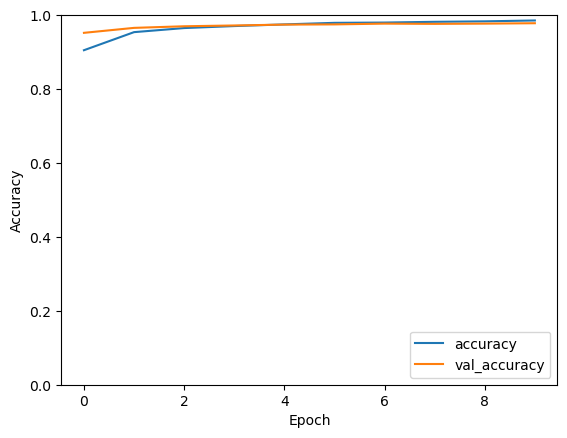

In [34]:
# 레이블 원-핫 인코딩 (num_classes를 지정하지 않으면 모델의 클래스 개수로 판단함)
trn_lbl = utils.to_categorical(trn_lbl) 
tst_lbl = utils.to_categorical(tst_lbl)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit (trn_img, trn_lbl, epochs=10, validation_split=0.2)

# 학습 과정 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(tst_img, tst_lbl, verbose=2)
print(f"테스트 정확도: {test_acc}")

313/313 - 1s - loss: 0.0728 - accuracy: 0.9799 - 1s/epoch - 5ms/step
테스트 정확도: 0.9799000024795532
